In [1]:
### This notebook is based on a version generously provided by Scott Pesme.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from diag_nets import *

sns.set(font_scale=1.1)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['text.usetex'] = True


from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')

import warnings
warnings.filterwarnings('ignore')
colors = ['olive', 'brown', 'pink', 'blue', 'orange', 'green', 'red', 'k', 'purple']
color_erm, color_erm_sam, color_sam_erm = 'red', 'orange', 'green'
label_size = 16


np.random.seed(0)
n = 20  # 20 / 40   # number of examples
n_test = 1000
d = 30  # 30 / 100  # dimension of features
r = 3  # 3 / 5   # sparsity

# generate random points
H = np.eye(d)
X = np.random.multivariate_normal(np.zeros(d), H, n)
X_test = np.random.multivariate_normal(np.zeros(d), H, n_test)

# generate sparse random gold model, corresponds to beta^*_ell_0 in paper
theta_star = np.random.randn(d)
theta_star[r:] = 0
theta_star = np.abs(theta_star) / np.linalg.norm(theta_star)

# generate labels
y = X @ theta_star
y_test = X_test @ theta_star

power = 4.0
num_iter = int(10**power) + 1
# iters_plot = np.unique(np.round(np.logspace(0, power, 501)))
# iters_plot = np.unique(np.round(np.linspace(0, num_iter, 101)))[:-1]
iters_loss_first = np.array(range(500))
iters_loss_log_scale = np.round(np.logspace(0, power, 201, dtype=int))
iters_loss = np.unique(np.concatenate((iters_loss_first, iters_loss_log_scale)))

GD (gamma=0.167): test loss 0.015056044189449159
n-SAM GD (gamma=0.167, rho=0.01): test loss 0.015143589149560101
n-SAM GD (gamma=0.167, rho=0.03): test loss 0.01532189739609112
n-SAM GD (gamma=0.167, rho=0.1): test loss 0.01598195225147282
n-SAM GD (gamma=0.167, rho=0.3): test loss 0.018241642036376265
n-SAM GD (gamma=0.167, rho=1.0): test loss 0.03606494489010675


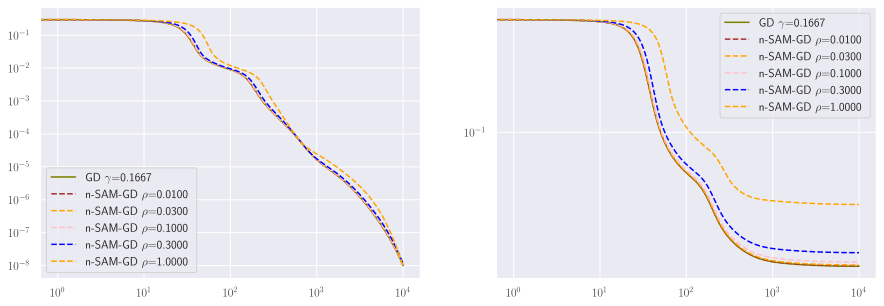

In [13]:
gamma = 5 / d
rhos = np.array([0.01, 0.03, 0.1, 0.3, 1.0])  # for n-SAM
 
plt.figure(figsize = (15, 5))

u0, v0 = 0.1 * np.ones(d), 0.0 * np.ones(d)
train_losses_gd, test_losses_gd, _, _ = GD(X, y, X_test, y_test, gamma, u0, v0, iters_loss, num_iter, wd=0.0)
print('GD (gamma={:.3f}): test loss {}'.format(gamma, test_losses_gd[-1]))

plt.subplot(1, 2, 1)
plt.loglog(iters_loss, train_losses_gd, label = r'GD 'r'$\gamma$=' + "{:.4f}".format(gamma) , color=colors[0])
plt.legend()

plt.subplot(1, 2, 2)
plt.loglog(iters_loss, test_losses_gd , label = r'GD 'r'$\gamma$=' + "{:.4f}".format(gamma) , color=colors[0])
plt.legend()

colors = ['olive', 'brown', 'orange', 'pink', 'blue', 'orange', 'green', 'red', 'k', 'purple']
for i, rho in enumerate(rhos):
    train_losses, test_losses, _, _ = n_SAM_GD(X, y, X_test, y_test, gamma, u0, v0, iters_loss, num_iter, rho=rho)
    print('n-SAM GD (gamma={:.3f}, rho={}): test loss {}'.format(gamma, rho, test_losses[-1]))
    
    plt.subplot(1, 2, 1)
    plt.loglog(iters_loss, train_losses, label = r'n-SAM-GD 'r'$\rho$=' + "{:.4f}".format(rho) , color=colors[i+1], linestyle='--')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.loglog(iters_loss, test_losses, label = r'n-SAM-GD 'r'$\rho$=' + "{:.4f}".format(rho) , color=colors[i+1], linestyle='--')
    plt.legend()

GD (gamma=0.167): test loss 0.0006337885714222886
one-SAM GD (gamma=0.167, rho=0.01): test loss 0.0004663830742908966
one-SAM GD (gamma=0.167, rho=0.03): test loss 0.00023853572282255735
one-SAM GD (gamma=0.167, rho=0.1): test loss 1.5396958089444108e-05
one-SAM GD (gamma=0.167, rho=0.3): test loss 0.024183218285324055


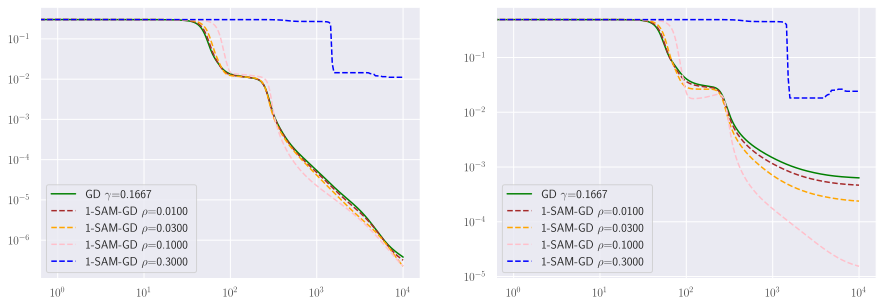

In [6]:
gamma = 5 / d
rhos = np.array([0.01, 0.03, 0.1, 0.3])  # for 1-SAM
 
plt.figure(figsize = (15, 5))

u0, v0 = 0.02 * np.ones(d), 0.0 * np.ones(d)
train_losses_gd, test_losses_gd, _, _ = GD(X, y, X_test, y_test, gamma, u0, v0, iters_loss, num_iter)
print('GD (gamma={:.3f}): test loss {}'.format(gamma, test_losses_gd[-1]))

plt.subplot(1, 2, 1)
plt.loglog(iters_loss, train_losses_gd, label = r'GD 'r'$\gamma$=' + "{:.4f}".format(gamma) , color=colors[i])
plt.legend()

plt.subplot(1, 2, 2)
plt.loglog(iters_loss, test_losses_gd, label = r'GD 'r'$\gamma$=' + "{:.4f}".format(gamma) , color=colors[i])
plt.legend()

for i, rho in enumerate(rhos):
    train_losses_onesam, test_losses_onesam, _, _ = one_SAM_GD(X, y, X_test, y_test, gamma, u0, v0, iters_loss, num_iter, rho=rho)
    print('one-SAM GD (gamma={:.3f}, rho={}): test loss {}'.format(gamma, rho, test_losses_onesam[-1]))

    plt.subplot(1, 2, 1)
    plt.loglog(iters_loss, train_losses_onesam, label = r'1-SAM-GD 'r'$\rho$=' + "{:.4f}".format(rho) , color=colors[i+1], linestyle='--')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.loglog(iters_loss, test_losses_onesam, label = r'1-SAM-GD 'r'$\rho$=' + "{:.4f}".format(rho) , color=colors[i+1], linestyle='--')
    plt.legend()

GD (gamma=0.333): test loss 0.015747762611708224
SGD (gamma=0.111): test loss 0.00917508147156238
SGD (gamma=0.333): test loss 0.002480534609648869
one-SAM GD (gamma=0.333, rho=0.03): test loss 0.009127933293039658
one-SAM GD (gamma=0.333, rho=0.1): test loss 0.0015235412218010903
one-SAM GD (gamma=0.333, rho=0.15): test loss 0.00025260386614471894
one-SAM GD (gamma=0.333, rho=0.2): test loss 1.5622244035909675e-05
one-SAM GD (gamma=0.333, rho=0.3): test loss 1.316634050881677e-08


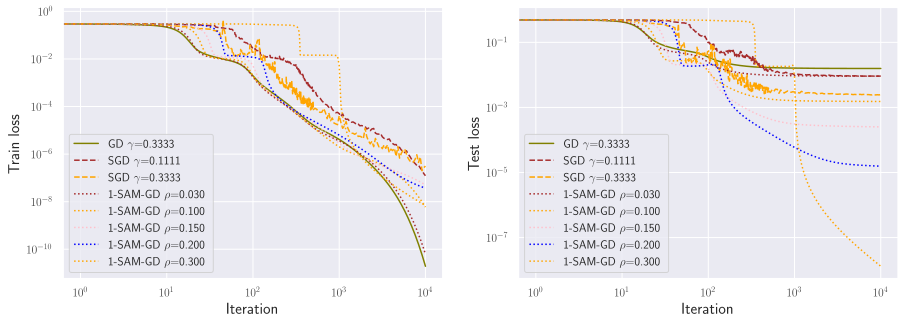

In [18]:
gamma = 10 / d
 
plt.figure(figsize = (15, 5))

u0, v0 = 0.1 * np.ones(d), 0.0 * np.ones(d)

train_losses_gd, test_losses_gd, _, _ = GD(X, y, X_test, y_test, gamma, u0, v0, iters_loss, num_iter)
print('GD (gamma={:.3f}): test loss {}'.format(gamma, test_losses_gd[-1]))

plt.subplot(1, 2, 1)
plt.loglog(iters_loss, train_losses_gd, label = r'GD 'r'$\gamma$=' + "{:.4f}".format(gamma) , color=colors[0])
plt.xlabel('Iteration', fontsize=label_size)
plt.ylabel('Train loss', fontsize=label_size)
plt.legend()

plt.subplot(1, 2, 2)
plt.loglog(iters_loss, test_losses_gd, label = r'GD 'r'$\gamma$=' + "{:.4f}".format(gamma) , color=colors[0])
plt.xlabel('Iteration', fontsize=label_size)
plt.ylabel('Test loss', fontsize=label_size)
plt.legend()

gammas = np.array([gamma / 3, gamma])  
for i, gamma_sgd in enumerate(gammas):
    train_losses, test_losses, _, _ = SGD(X, y, X_test, y_test, gamma_sgd, u0, v0, iters_loss, num_iter)
    print('SGD (gamma={:.3f}): test loss {}'.format(gamma_sgd, test_losses[-1]))
    
    plt.subplot(1, 2, 1)
    plt.loglog(iters_loss, train_losses, label = r'SGD 'r'$\gamma$=' + "{:.4f}".format(gamma_sgd), color=colors[i+1], linestyle='--')
    plt.xlabel('Iteration', fontsize=label_size)
    plt.ylabel('Train loss', fontsize=label_size)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.loglog(iters_loss, test_losses, label = r'SGD 'r'$\gamma$=' + "{:.4f}".format(gamma_sgd), color=colors[i+1], linestyle='--')
    plt.xlabel('Iteration', fontsize=label_size)
    plt.ylabel('Test loss', fontsize=label_size)
    plt.legend()

rhos = np.array([0.03, 0.1, 0.15, 0.2, 0.3])  # for 1-SAM
for i, rho in enumerate(rhos):
    train_losses, test_losses, _, _ = one_SAM_GD(X, y, X_test, y_test, gamma, u0, v0, iters_loss, num_iter, rho=rho)
    print('one-SAM GD (gamma={:.3f}, rho={}): test loss {}'.format(gamma, rho, test_losses[-1]))

    plt.subplot(1, 2, 1)
    plt.loglog(iters_loss, train_losses, label = r'1-SAM-GD 'r'$\rho$=' + "{:.3f}".format(rho), color=colors[i+1], linestyle='dotted')
    plt.xlabel('Iteration', fontsize=label_size)
    plt.ylabel('Train loss', fontsize=label_size)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.loglog(iters_loss, test_losses, label = r'1-SAM-GD 'r'$\rho$=' + "{:.3f}".format(rho), color=colors[i+1], linestyle='dotted')
    plt.xlabel('Iteration', fontsize=label_size)
    plt.ylabel('Test loss', fontsize=label_size)
    plt.legend()

GD (gamma=0.500): test loss 0.016445781003091926
n-SAM GD (rho=0.001): test loss 0.015756677115280553
n-SAM GD (rho=0.003): test loss 0.015774538224235406
n-SAM GD (rho=0.01): test loss 0.01583739124793595
n-SAM GD (rho=0.03): test loss 0.016019930687941112
n-SAM GD (rho=0.1): test loss 0.016695513663723727
n-SAM GD (rho=0.3): test loss 0.019007119935097728
n-SAM GD (rho=0.9): test loss 0.032812027137658364
one-SAM GD (rho=0.001): test loss 0.016174901502986682
one-SAM GD (rho=0.003): test loss 0.015641003537756094
one-SAM GD (rho=0.01): test loss 0.013855445463941646
one-SAM GD (rho=0.03): test loss 0.009469059057662111
one-SAM GD (rho=0.1): test loss 0.0015339774886805526
one-SAM GD (rho=0.3): test loss 6.350068450874803e-09
one-SAM GD (rho=0.9): test loss nan


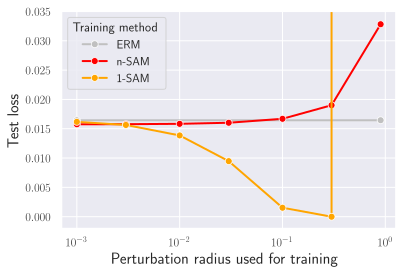

In [21]:
# Grid search for n-SAM vs. 1-SAM
test_losses_gs_nsam, test_losses_gs_1sam = [], []

gamma = 15 / d 
u0, v0 = 0.1 * np.ones(d), 0.0 * np.ones(d)

train_losses_gd, test_losses_gd, _, _ = GD(X, y, X_test, y_test, gamma, u0, v0, iters_loss, num_iter)
print('GD (gamma={:.3f}): test loss {}'.format(gamma, test_losses_gd[-1]))

rhos_nsam = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 0.9])
for i, rho in enumerate(rhos_nsam):
    train_losses_nsam, test_losses_nsam, _, _ = n_SAM_GD(X, y, X_test, y_test, gamma_sgd, u0, v0, iters_loss, num_iter, rho=rho)
    val_to_plot = test_losses_nsam[-1] if not np.isnan(test_losses_nsam[-1]) else 999
    test_losses_gs_nsam.append(val_to_plot)
    print('n-SAM GD (rho={}): test loss {}'.format(rho, test_losses_nsam[-1]))

rhos_1sam = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 0.9])
for i, rho in enumerate(rhos_1sam):
    train_losses_1sam, test_losses_1sam, _, _ = one_SAM_GD(X, y, X_test, y_test, gamma, u0, v0, iters_loss, num_iter, rho=rho)
    val_to_plot = test_losses_1sam[-1] if not np.isnan(test_losses_1sam[-1]) else 999
    test_losses_gs_1sam.append(val_to_plot)
    print('one-SAM GD (rho={}): test loss {}'.format(rho, test_losses_1sam[-1]))


# Plot of the grid search
marker_size, line_width = 7.0, 2.0

ax = sns.lineplot(x=[rhos_nsam[0], rhos_nsam[-1]], y=[test_losses_gd[-1], test_losses_gd[-1]], linewidth=line_width, marker='o', markersize=marker_size, label='ERM', color='silver')
ax = sns.lineplot(x=rhos_nsam, y=test_losses_gs_nsam, linewidth=line_width, marker='o', markersize=marker_size, label='n-SAM', color='red')
ax = sns.lineplot(x=rhos_1sam, y=test_losses_gs_1sam, linewidth=line_width, marker='o', markersize=marker_size, label='1-SAM', color='orange')

ax.set_xlabel('Perturbation radius used for training', size=label_size)
ax.set_ylabel('Test loss', size=label_size)
ax.set_xscale('log')  
# ax.set_yscale('log')  
ax.set_ylim(-0.002, 0.035)
ax.legend(title='Training method', loc='best')
plt.savefig('plots/diag_nets_gd_nsam_1sam.pdf', bbox_inches='tight')
plt.show()

In [22]:
gamma = 1 / d
u0, v0 = 0.1 * np.ones(d), 0.0 * np.ones(d)

# ERM run
iters_loss_2x = np.concatenate([iters_loss, iters_loss+num_iter])
train_losses_erm, test_losses_erm, _, _ = GD(X, y, X_test, y_test, gamma, u0, v0, iters_loss_2x, 2*num_iter)
print('ERM (gamma={:.3f}): test loss {}'.format(gamma, test_losses_erm[-1]))

# ERM -> 1-SAM run
train_losses_erm_start, test_losses_erm_start, u_erm, v_erm = GD(X, y, X_test, y_test, gamma, u0, v0, iters_loss, num_iter)
print('ERM (gamma={:.3f}): test loss {}'.format(gamma, test_losses_erm_start[-1]))
train_losses_erm_sam, test_losses_erm_sam, u_erm_sam, v_erm_sam = one_SAM_GD(X, y, X_test, y_test, gamma, u_erm, v_erm, iters_loss, num_iter, rho=10.0)
print('ERM -> 1-SAM (gamma={:.3f}, rho={}): test loss {}'.format(gamma, rho, test_losses_erm_sam[-1]))

# 1-SAM -> ERM experiment
train_losses_sam_start, test_losses_sam_start, u_sam, v_sam = one_SAM_GD(X, y, X_test, y_test, gamma, u0, v0, iters_loss, num_iter, rho=0.175)
print('one-SAM GD (gamma={:.3f}, rho={}): test loss {}'.format(gamma, rho, test_losses_sam_start[-1]))
train_losses_sam_erm, test_losses_sam_erm, u_sam_erm, v_sam_erm = GD(X, y, X_test, y_test, gamma, u_sam, v_sam, iters_loss, num_iter)
print('one-SAM GD -> GD (gamma={:.3f}): test loss {}'.format(gamma, test_losses_sam_erm[-1]))

ERM (gamma=0.033): test loss 0.014602323023706629
ERM (gamma=0.033): test loss 0.014865600195083558
ERM -> 1-SAM (gamma=0.033, rho=0.9): test loss 0.00014269229669575567
one-SAM GD (gamma=0.033, rho=0.9): test loss 0.0001245758657536336
one-SAM GD -> GD (gamma=0.033): test loss 9.834845199886545e-05


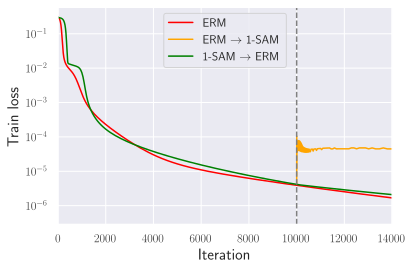

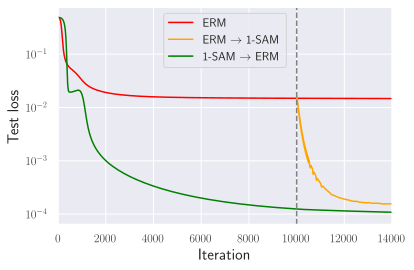

In [25]:
# train loss plot
max_iter_show = int(num_iter * 1.4)
sns.lineplot(np.concatenate([iters_loss, iters_loss + num_iter]), train_losses_erm, label=r'ERM', color=color_erm)
sns.lineplot(iters_loss + num_iter, train_losses_erm_sam, label=r'ERM $\rightarrow$ 1-SAM', color=color_erm_sam)
sns.lineplot(np.concatenate([iters_loss, iters_loss + num_iter]), np.concatenate([train_losses_sam_start, train_losses_sam_erm]), label=r'1-SAM $\rightarrow$ ERM', color=color_sam_erm)
plt.axvline(x=num_iter, color='gray', linestyle='--')
plt.xlim(0, max_iter_show)

plt.yscale('log')
plt.xlabel('Iteration', fontsize=label_size)
plt.ylabel('Train loss', fontsize=label_size)

plt.savefig("plots/diag_net_erm-sam_sam-erm_train.pdf", bbox_inches='tight')
plt.show()


# test loss plot
sns.lineplot(np.concatenate([iters_loss, iters_loss + num_iter]), test_losses_erm, label=r'ERM', color=color_erm)
sns.lineplot(iters_loss + num_iter, test_losses_erm_sam, label=r'ERM $\rightarrow$ 1-SAM', color=color_erm_sam)
sns.lineplot(np.concatenate([iters_loss, iters_loss + num_iter]), np.concatenate([test_losses_sam_start, test_losses_sam_erm]), label=r'1-SAM $\rightarrow$ ERM', color=color_sam_erm)
plt.axvline(x=num_iter, color='gray', linestyle='--')
plt.xlim(0, max_iter_show)

plt.yscale('log')
plt.xlabel('Iteration', fontsize=label_size)
plt.ylabel('Test loss', fontsize=label_size)

plt.savefig("plots/diag_net_erm-sam_sam-erm_test.pdf", bbox_inches='tight')
plt.show()

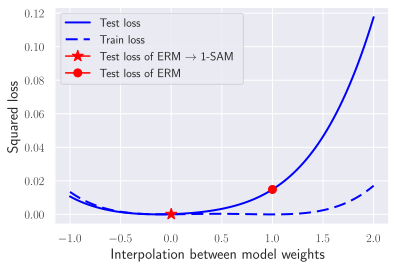

In [27]:
# 1D loss surface interpolation
sns.set(font_scale=1.1)
# sns.set(rc={'figure.figsize':(7,2.2)}, font_scale=1.1)
marker_size, line_width = 2.0, 2.0
label_size = 15

alphas = np.linspace(-1, 2, 100)
test_loss_interpolations, train_loss_interpolations = [], []
for alpha in alphas:
    u = (1-alpha) * u_erm_sam + alpha * u_erm
    v = (1-alpha) * v_erm_sam + alpha * v_erm
    test_loss_interpolations += [loss(X_test, X_test @ (u * v), y_test)]
    train_loss_interpolations += [loss(X, X @ (u * v), y)]
test_loss_interpolations, train_loss_interpolations = np.array(test_loss_interpolations), np.array(train_loss_interpolations)

ax = sns.lineplot(x=alphas, y=test_loss_interpolations, linewidth=line_width, markersize=marker_size, label='Test loss', color='blue')
ax = sns.lineplot(x=alphas, y=train_loss_interpolations, linewidth=line_width, markersize=marker_size, label='Train loss', color='blue')
ax.plot(0, test_loss_interpolations[alphas == 0][0], marker="*", markersize=12.0, color='red', label=r'Test loss of ERM $\rightarrow$ 1-SAM')
ax.plot(1, test_loss_interpolations[alphas == 1][0], marker="o", markersize=8.0, color='red', label=r'Test loss of ERM')
# plt.yscale('log')  # note: linear connectivity holds only approximately if we check the log-scale! (although for classification, we could plot error and then in many cases linear connectivity would be exact)
dashed_linestyle = (0, (6, 3))  # 'dashed'
ax.lines[1].set_linestyle(dashed_linestyle)
ax.legend().get_lines()[1].set_linestyle(dashed_linestyle)
ax.set_xlabel('Interpolation between model weights', size=label_size)
ax.set_ylabel('Squared loss', size=label_size)

plt.savefig('plots/loss_surfaces_diag_net.pdf', bbox_inches='tight')
plt.show()